Alexandre Lebas - Océane Deletrez

# Part 1 : Iris recognition

# Q1 : Considering the 5-fold cross validation, what is the size of the test sample and the training sample?


In [1]:
# Charger les données
data = iris
ind = sample(2,nrow(data),replace = TRUE, prob = c(0.75,0.25))
train.data = iris[ind == 1,]
test.data = iris[ind ==2,]

In [2]:
install.packages("party")

Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'party' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alex5\AppData\Local\Temp\RtmpwNxFRm\downloaded_packages


In [3]:
library(party)

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : mvtnorm

Le chargement a nécessité le package : modeltools

Le chargement a nécessité le package : stats4

Le chargement a nécessité le package : strucchange

Le chargement a nécessité le package : zoo


Attachement du package : 'zoo'


Les objets suivants sont masqués depuis 'package:base':

    as.Date, as.Date.numeric


Le chargement a nécessité le package : sandwich



In [4]:
install.packages("tidyverse")
install.packages("caret")
install.packages("e1071")

Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alex5\AppData\Local\Temp\RtmpwNxFRm\downloaded_packages


Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alex5\AppData\Local\Temp\RtmpwNxFRm\downloaded_packages


Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)




  Une version binaire est disponible mais la version du source est plus
  récente:
      binary source needs_compilation
e1071  1.7-8  1.7-9              TRUE

  Binaries will be installed
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alex5\AppData\Local\Temp\RtmpwNxFRm\downloaded_packages


In [5]:
library(caret)


Le chargement a nécessité le package : lattice

Le chargement a nécessité le package : ggplot2



In [6]:
# Paramétrer le 5-fold avec la librairie caret
train_control = trainControl(method = "cv",number = 5)

In [7]:
# Entrainer le modèle avec les données, la méthode et mettre le 5-fold en place avec trControl
myFormula = Species ~ Sepal.Length + Sepal.Width + Petal.Length +Petal.Width
model = train(myFormula,data = train.data,method = "ctree",trControl = train_control)

In [8]:
print(model)

Conditional Inference Tree 

113 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 90, 90, 91, 91, 90 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa    
  0.01          0.9375494  0.9061725
  0.50          0.9375494  0.9061725
  0.99          0.9375494  0.9061725

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


# Q2 : Install the "party" and "Mlmetrics" packages. What are they
Party est un package pour la réalisation d'arbre de décision, et MLmetrics est un package pour le calcul de métrique d'évaluation

In [9]:
# Party est déjà installé
install.packages("MLmetrics")

Installation du package dans 'C:/Users/alex5/OneDrive/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'MLmetrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alex5\AppData\Local\Temp\RtmpwNxFRm\downloaded_packages


In [10]:
library(MLmetrics)


Attachement du package : 'MLmetrics'


Les objets suivants sont masqués depuis 'package:caret':

    MAE, RMSE


L'objet suivant est masqué depuis 'package:base':

    Recall




# Q3 : Realize the function "scoring" of parameter N. N corresponds to N-Fold.

In [11]:
# Récupérer l'arbre final du modèle entrainé avec le 5-fold
Arbre = model$finalModel
Arbre


	 Conditional inference tree with 4 terminal nodes

Response:  .outcome 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  113 

1) Petal.Length <= 1.9; criterion = 1, statistic = 105.325
  2)*  weights = 35 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.7; criterion = 1, statistic = 53.28
    4) Petal.Length <= 4.7; criterion = 0.999, statistic = 14.651
      5)*  weights = 31 
    4) Petal.Length > 4.7
      6)*  weights = 7 
  3) Petal.Width > 1.7
    7)*  weights = 40 

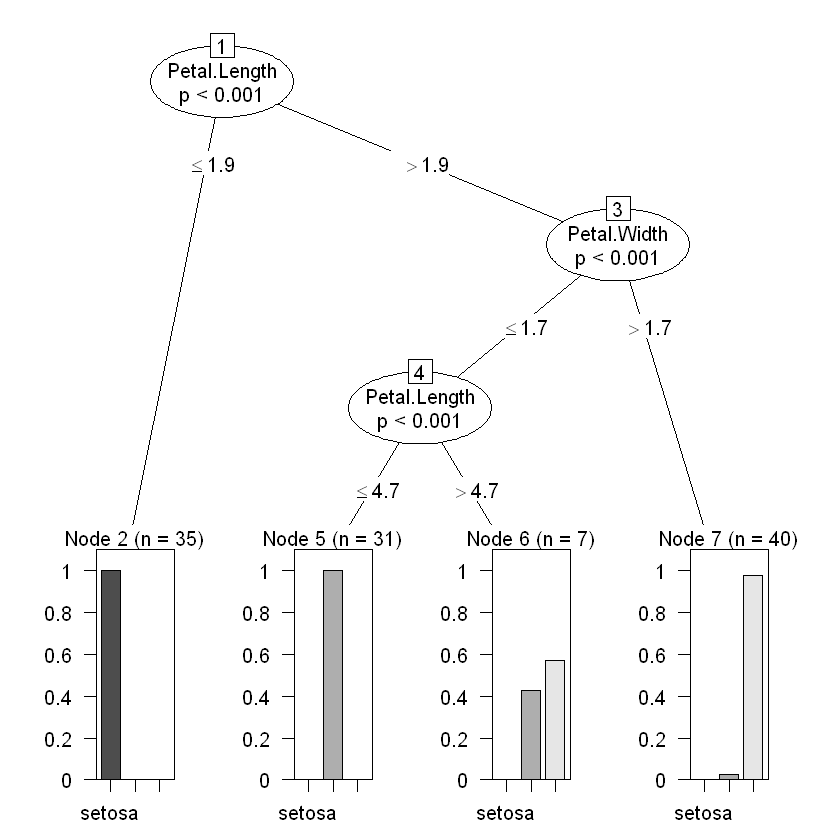

In [12]:
plot(Arbre)

In [13]:
# Prédire les espèces du jeu de test et les comparé aux vraies valeurs
predictTest = predict(Arbre,newdata = test.data)
table(predictTest,test.data$Species)

            
predictTest  setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2         6

In [14]:
# Prédire les espèces du jeu d'entrainement et les comparé aux vraies valeurs
predictTrain = predict(Arbre,newdata = train.data)
table(predictTrain,train.data$Species)

            
predictTrain setosa versicolor virginica
  setosa         35          0         0
  versicolor      0         31         0
  virginica       0          4        43

In [15]:
# Convertir les valeurs des espéces predite en numique pour pouvoir calculer le MAE
yTePred = as.numeric(predictTest)
yTePred

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2 3 3 3 3 3

In [16]:
yTeReel = as.numeric(test.data$Species)

In [17]:
MAE(yTePred,yTeReel)

[1] 0.08108108

In [18]:
yTrPred = as.numeric(predictTrain)

In [19]:
yTrReel = as.numeric(train.data$Species)

In [20]:
MAE(yTrPred,yTrReel)

[1] 0.03539823

# Q4 : What do you think about the quality of models?
<p>La qualité du modèle entrainé est satisfaisante. Il y a quelques erreurs effectuées sur le jeu d'entrainement et le jeu de test mais la majorité des espèces sont correctement prédites.</p>
<p>Pour le taux MAE on remarque que le taux d'erreur est plus important sur le jeu de test que celui d'entrainement ce qui traduit un léger sur apprentisage des données sur le jeu d'entrainement ce qui est normal vu que le modèle connaît déja les données d'entrainement.</p>